In [0]:
import numpy as ny
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [0]:
bndata['Banknote'].describe()

count        1000
unique          2
top       Genuine
freq          500
Name: Banknote, dtype: object

In [0]:
bndata1 = pd.DataFrame()
bndata = pd.read_csv('quizData.csv')
bndata['Banknote'] = bndata['Banknote'].astype('category')
bndata.head()


,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


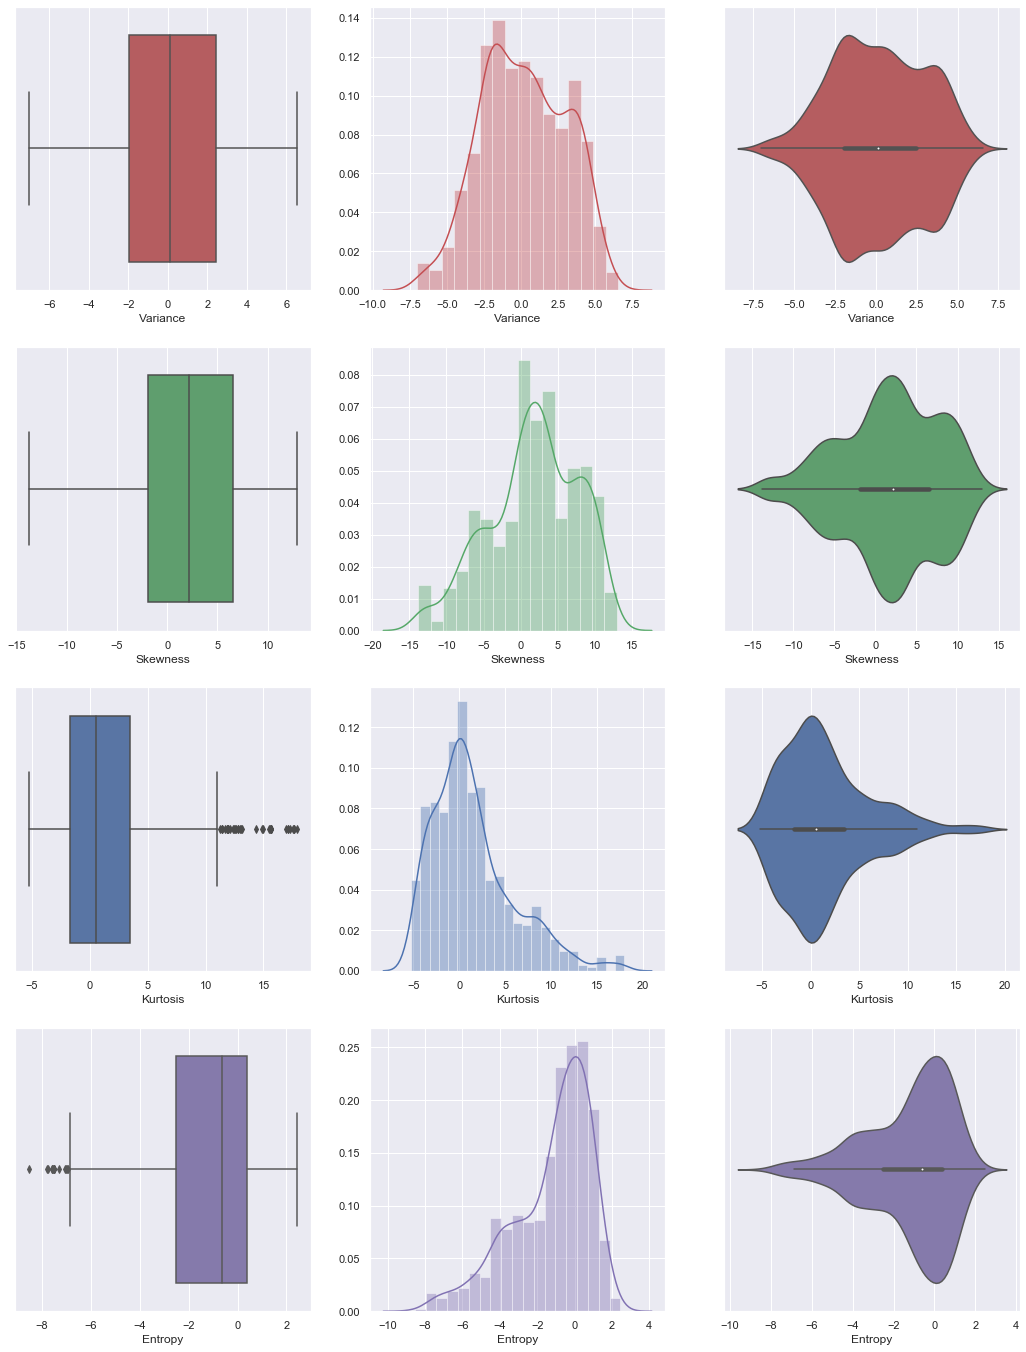

In [0]:
numdata = pd.DataFrame(bndata[["Variance", "Skewness", "Kurtosis", "Entropy"]])
f, axes = plt.subplots(4,3, figsize =(18,24))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in numdata:
    sb.boxplot(numdata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numdata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numdata[var], color = colors[count], ax = axes[count,2])
    count += 1

In [0]:
#bndata['Banknote'].value_counts(normalize = True)
(bndata['Banknote'].value_counts()/bndata['Banknote'].count())*100


Genuine    50.0
Forged     50.0
Name: Banknote, dtype: float64

In [0]:
Q1 = numdata['Kurtosis'].quantile(0.25)
Q3 = numdata['Kurtosis'].quantile(0.75)
IQR = Q3 - Q1
print(((numdata['Kurtosis'] < (Q1 - 1.5 * IQR)) | (numdata["Kurtosis"] > (Q3 + 1.5 * IQR))).sum())

37


In [0]:
Q1 = numdata['Entropy'].quantile(0.25)
Q3 = numdata['Entropy'].quantile(0.75)
IQR = Q3 - Q1
print(((numdata['Entropy'] < (Q1 - 1.5 * IQR)) | (numdata["Entropy"] > (Q3 + 1.5 * IQR))).sum())

16


Genuine    500
Forged     500
Name: Banknote, dtype: int64


count        1000
unique          2
top       Genuine
freq          500
Name: Banknote, dtype: object

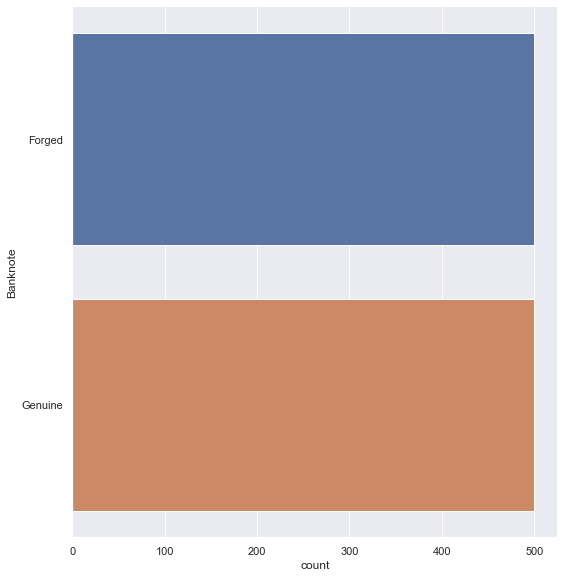

In [0]:
sb.catplot(y = 'Banknote', data = bndata, kind = "count", height = 8)
print(bndata['Banknote'].value_counts())
bndata['Banknote'].describe()

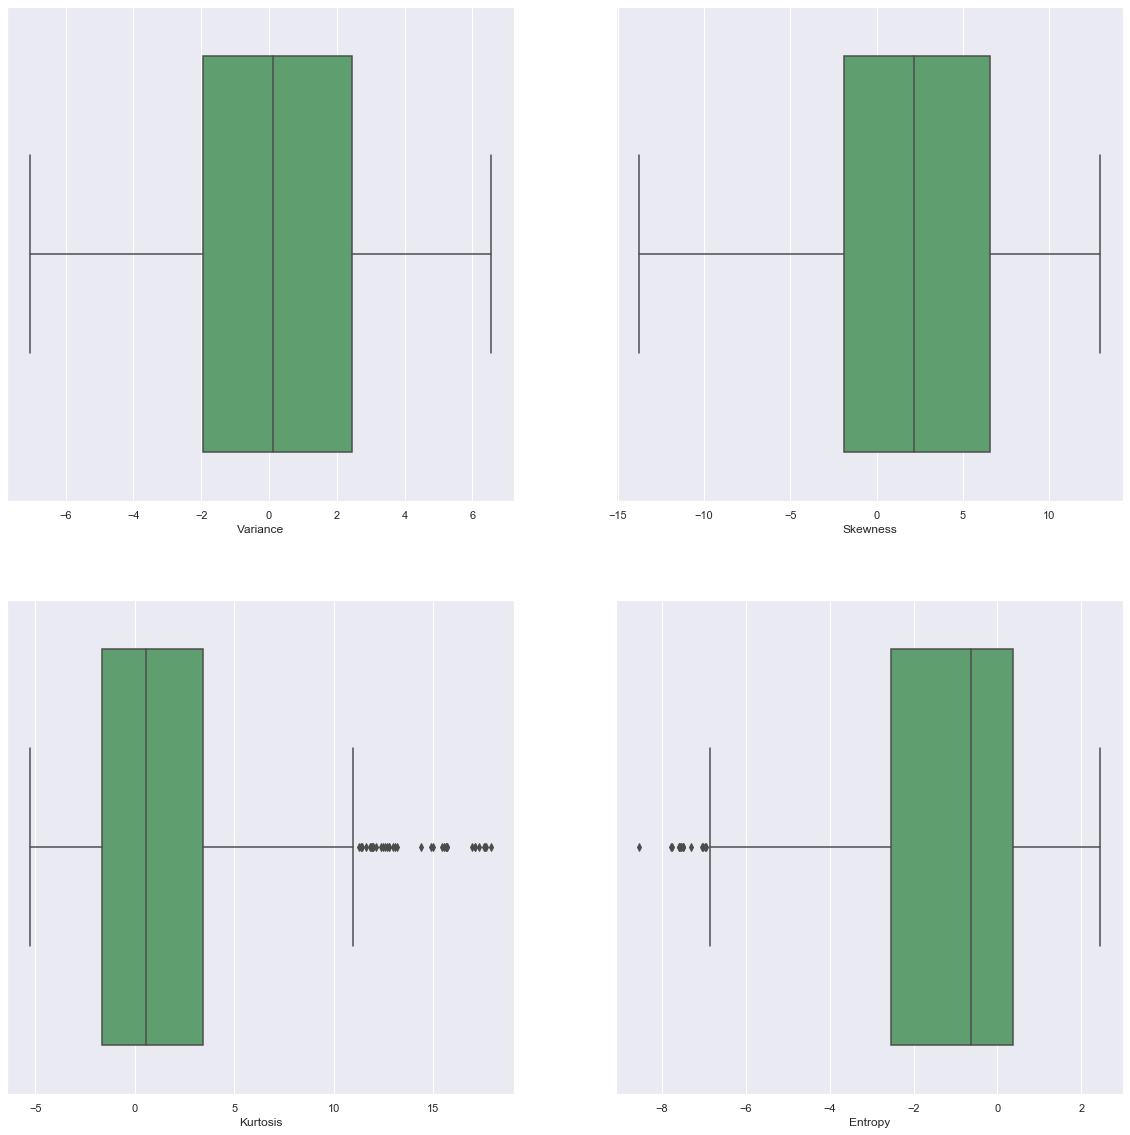

In [0]:
f, axes = plt.subplots(2, 2, figsize=(20, 20))
count = 0
colors = ["r", "g", "b", "m", "c"]
sb.boxplot(bndata['Variance'], orient = "h", color = 'g', ax = axes[0,0])
sb.boxplot(bndata['Skewness'], orient = "h", color = 'g',ax = axes[0,1])
sb.boxplot(bndata['Kurtosis'], orient = "h", color = 'g',ax = axes[1,0])
sb.boxplot(bndata['Entropy'], orient = "h", color = 'g',ax = axes[1,1])


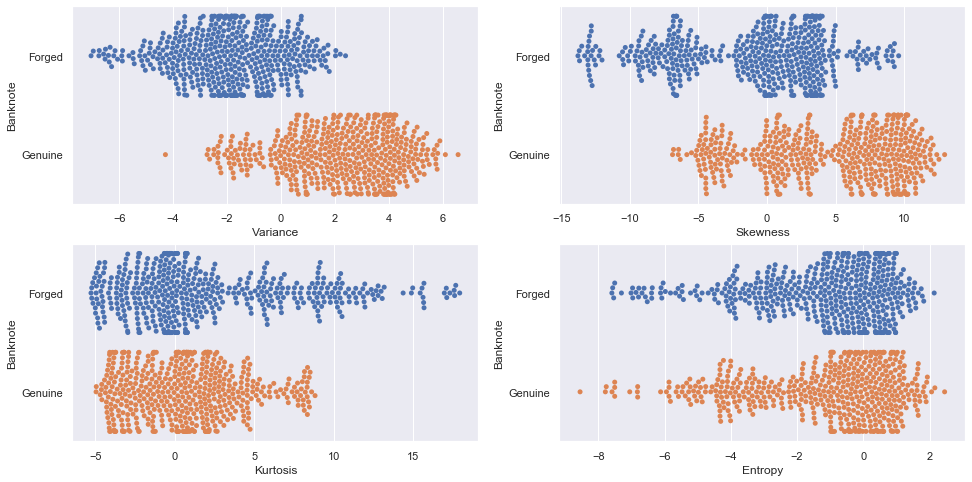

In [0]:
f, axes = plt.subplots(2, 2, figsize=(16, 8))
sb.swarmplot(x = 'Variance', y = 'Banknote', data = bndata, ax=axes[0,0])
sb.swarmplot(x = 'Skewness', y = 'Banknote', data = bndata, ax=axes[0,1])
sb.swarmplot(x = 'Kurtosis', y = 'Banknote', data = bndata, ax=axes[1,0])
sb.swarmplot(x = 'Entropy', y = 'Banknote', data = bndata, ax=axes[1,1])

In [0]:
#Problem 2

In [0]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Split the dataset into Train and Test       
bndata_train = pd.DataFrame(bndata[:800])
bndata_test  = pd.DataFrame(bndata[-200:])

# Check the sample sizes
print("Train Set :", bndata_train.shape)
print("Test Set  :", bndata_test.shape)

Train Set : (800, 5)
Test Set  : (200, 5)


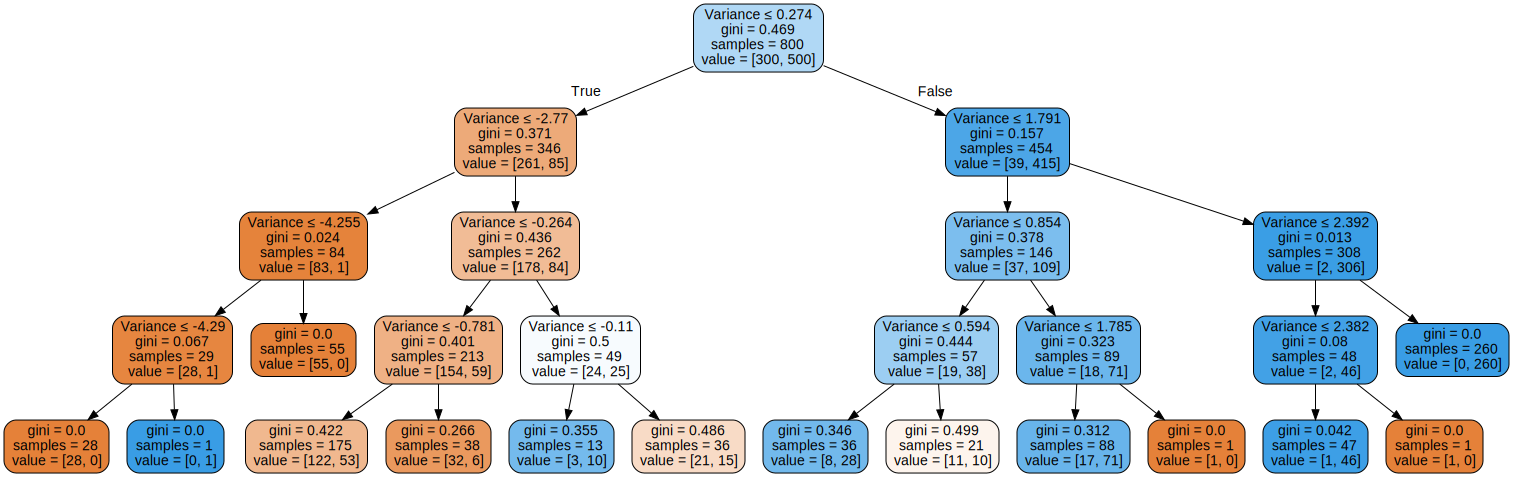

In [0]:
y_train = pd.DataFrame(bndata_train['Banknote'])
X_train = pd.DataFrame(bndata_train['Variance'])
y_test = pd.DataFrame(bndata_test['Banknote'])
X_test = pd.DataFrame(bndata_test['Variance'])
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)


Classification Accuracy 	: 0.85875
Classification Accuracy 	: 0.91


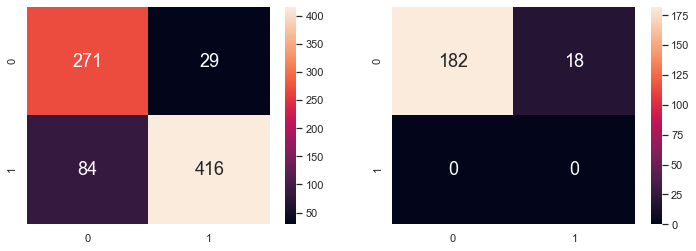

In [0]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Accuracy \t:", dectree.score(X_test, y_test))


# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2,figsize=(12,4))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax =axes[1])



In [0]:
y1_train = pd.DataFrame(bndata_train['Banknote'])
X1_train = pd.DataFrame(bndata_train['Skewness'])
y1_test = pd.DataFrame(bndata_test['Banknote'])
X1_test = pd.DataFrame(bndata_test['Skewness'])
# Train the Decision Tree Classifier model
dectree.fit(X1_train, y1_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

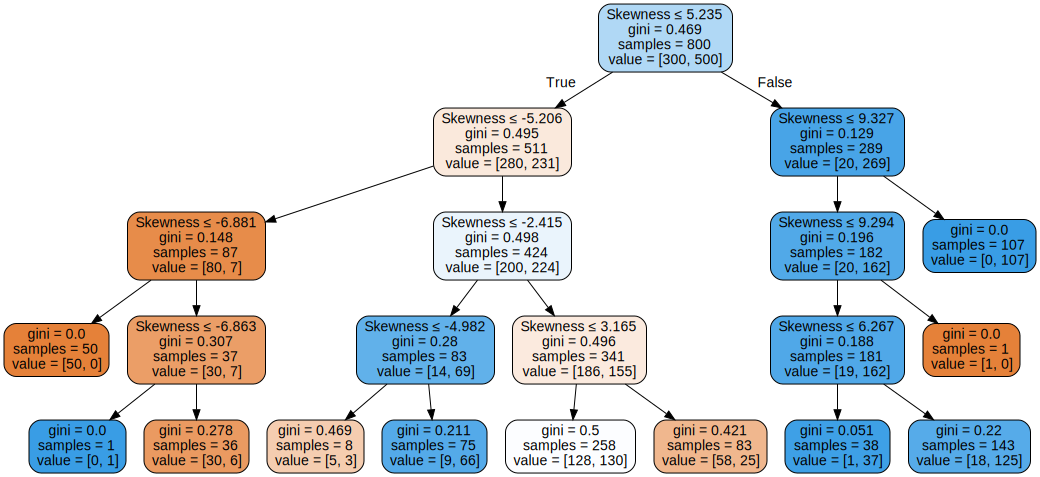

In [0]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X1_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.7625
Classification Accuracy 	: 0.485


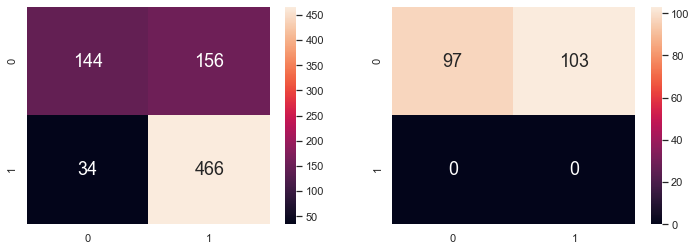

In [0]:
# Predict the Response corresponding to Predictors
y1_train_pred = dectree.predict(X1_train)

# Predict the Response corresponding to Predictors
y1_test_pred = dectree.predict(X1_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X1_train, y1_train))
print("Classification Accuracy \t:", dectree.score(X1_test, y1_test))


# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2,figsize=(12,4))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y1_train, y1_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y1_test, y1_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax =axes[1])



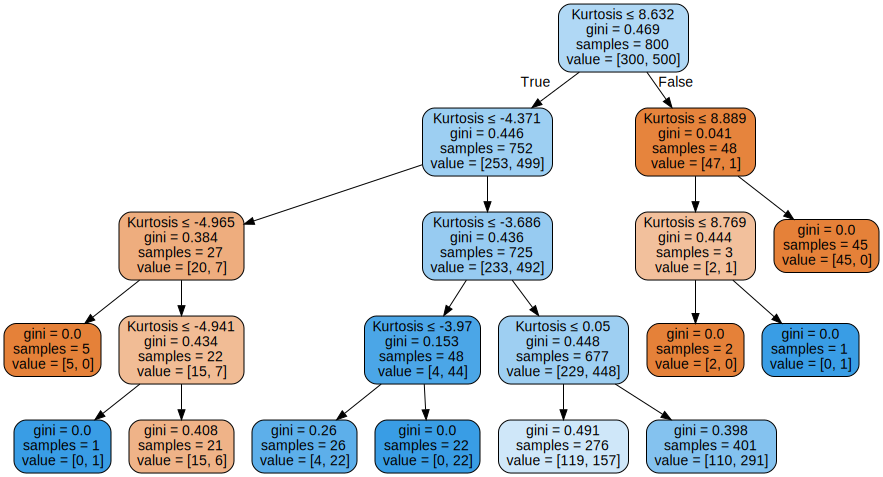

In [0]:
y2_train = pd.DataFrame(bndata_train['Banknote'])
X2_train = pd.DataFrame(bndata_train['Kurtosis'])
y2_test = pd.DataFrame(bndata_test['Banknote'])
X2_test = pd.DataFrame(bndata_test['Kurtosis'])
# Train the Decision Tree Classifier model
dectree.fit(X2_train, y2_train)


# Train the Decision Tree Classifier model
dectree.fit(X2_train, y2_train)

from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X2_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.70125
Classification Accuracy 	: 0.225


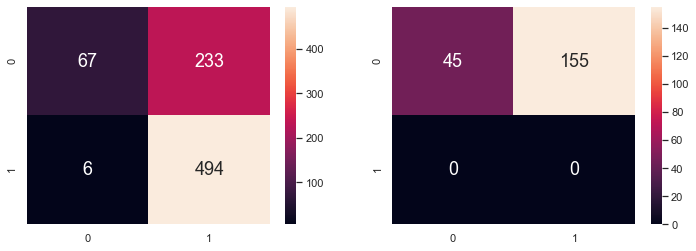

In [0]:
# Predict the Response corresponding to Predictors
y2_train_pred = dectree.predict(X2_train)

# Predict the Response corresponding to Predictors
y2_test_pred = dectree.predict(X2_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X2_train, y2_train))
print("Classification Accuracy \t:", dectree.score(X2_test, y2_test))


# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2,figsize=(12,4))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y2_train, y2_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax =axes[1])


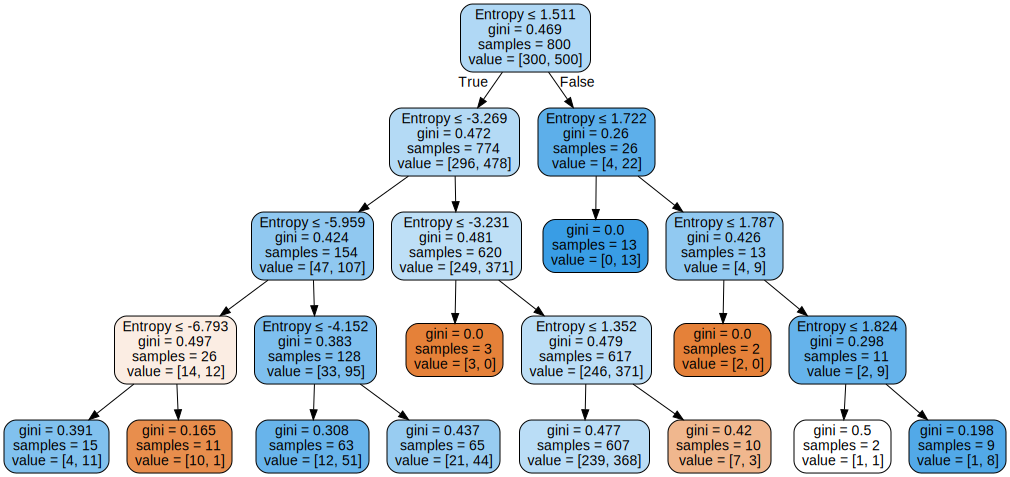

In [0]:
y3_train = pd.DataFrame(bndata_train['Banknote'])
X3_train = pd.DataFrame(bndata_train['Entropy'])
y3_test = pd.DataFrame(bndata_test['Banknote'])
X3_test = pd.DataFrame(bndata_test['Entropy'])
# Train the Decision Tree Classifier model
dectree.fit(X3_train, y3_train)

from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X3_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.6475
Classification Accuracy 	: 0.025


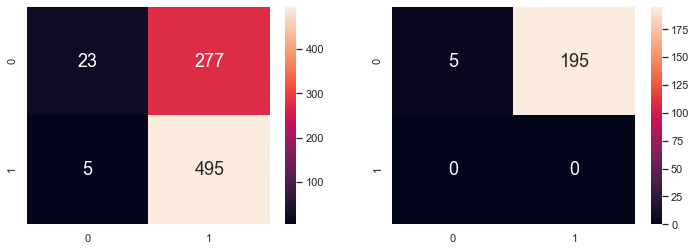

In [0]:
# Predict the Response corresponding to Predictors
y3_train_pred = dectree.predict(X3_train)

# Predict the Response corresponding to Predictors
y3_test_pred = dectree.predict(X3_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X3_train, y3_train))
print("Classification Accuracy \t:", dectree.score(X3_test, y3_test))

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2,figsize=(12,4))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y3_train, y3_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y3_test, y3_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax =axes[1])

In [0]:
#Variance as it has the least number of False Postive items identified

Train Set : (800, 5)
Test Set  : (200, 5)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.935



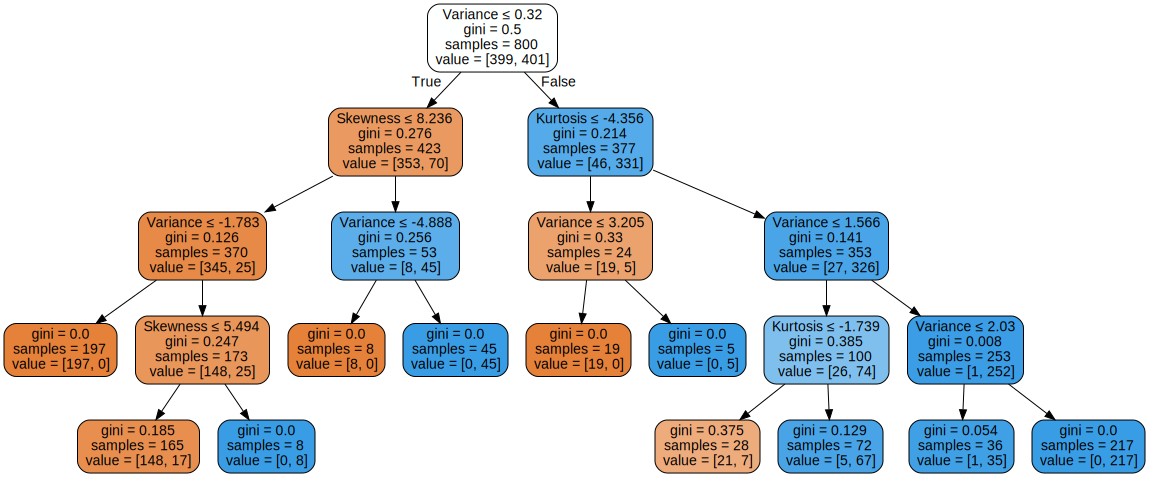

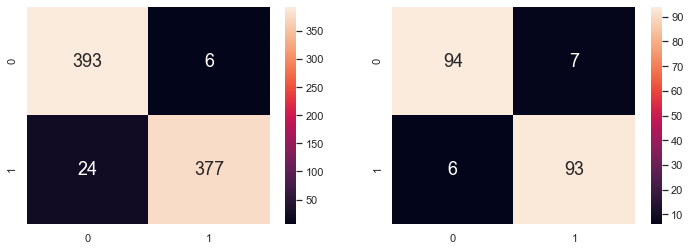

In [0]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Split the dataset into Train and Test       
bndata_train = pd.DataFrame(bndata[:800])
bndata_test  = pd.DataFrame(bndata[-200:])

# Check the sample sizes
print("Train Set :", bndata_train.shape)
print("Test Set  :", bndata_test.shape)

# Extract Response and Predictors
y = pd.DataFrame(bndata['Banknote'])
X = pd.DataFrame(bndata[['Variance', 'Skewness', 'Kurtosis', 'Entropy']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [0]:
TrainPrediction = pd.DataFrame(y_train_pred)
TrainXdata = pd.DataFrame(X_train)
TrainYdata = pd.DataFrame(y_train)


TrainPrediction = TrainPrediction.set_index(TrainYdata.index)
TrainCombined = pd.concat([TrainXdata,TrainYdata,TrainPrediction], axis =1)


TestPrediction = pd.DataFrame(y_test_pred)
TestXdata = pd.DataFrame(X_test)
TestYdata = pd.DataFrame(y_test)

TestPrediction = TestPrediction.set_index(TestYdata.index)
TestCombined = pd.concat([TestXdata,TestYdata,TestPrediction], axis =1)

CombinedData = pd.concat([TrainCombined, TestCombined])

CombinedData.columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Banknote", "PredictedBankNote"]
print("Everything")
print(CombinedData)

print("False Positive:")
print(CombinedData.where((CombinedData["Banknote"] == "Forged") & (CombinedData["PredictedBankNote"] == "Genuine")).dropna())

print("\n")

print("False Negative:")
print(CombinedData.where((CombinedData["Banknote"] == "Genuine") & (CombinedData["PredictedBankNote"] == "Forged")).dropna())


Everything
     Variance  Skewness  Kurtosis  Entropy Banknote PredictedBankNote
789   -3.7747    2.5162   0.83341 -0.30993   Forged            Forged
403    3.0864   -2.5845   2.23090  0.30947  Genuine           Genuine
185   -1.2537   10.8803   1.93100 -4.32370  Genuine           Genuine
21     0.3292   -4.4552   4.57180 -0.98880  Genuine           Genuine
555   -2.5880    3.8654  -0.33360 -1.27970   Forged            Forged
..        ...       ...       ...      ...      ...               ...
563   -2.2340   -7.0314   7.49360  0.61334   Forged            Forged
486    3.8832    6.4023  -2.43200 -0.98363  Genuine           Genuine
54     4.9264    5.4960  -2.47740 -0.50648  Genuine           Genuine
414    1.9818    9.2621  -3.52100 -1.87200  Genuine            Forged
199    5.8862    5.8747  -2.81670 -0.30087  Genuine           Genuine

[1000 rows x 6 columns]
False Positive:
     Variance  Skewness  Kurtosis  Entropy Banknote PredictedBankNote
655  1.563100   0.89599  -1.97020  0.6

In [0]:
# Function for train data confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    FP = cm[0][1]
    TN = cm[1][1]
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    FPR = FP/(TN+FP)
    print('False Postive Rate', FPR)
    FN = cm[1][0]
    TP = cm[0][0]
    FNR = FN/(FN+TP)
    print("False Negative Rate", FNR)
print_confusion_matrix(y_train, y_train_pred)

True positive =  398
False positive =  7
False negative =  14
True negative =  381
False Postive Rate 0.01804123711340206
False Negative Rate 0.03398058252427184


In [0]:
# Function for test data confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm1 = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm1[0][0])
    print('False positive = ', cm1[0][1])
    print('False negative = ', cm1[1][0])
    print('True negative = ', cm1[1][1])
    FN = cm1[1][0]
    TP = cm1[0][0]
    FNR = FN/(FN+TP)
    FP = cm1[0][1]
    TN = cm1[1][1]
    FPR = FP/(TN+FP)
    print('False Positive Rate:', FPR)
    print("False Negative:", FNR)
print_confusion_matrix(y_test, y_test_pred)

True positive =  90
False positive =  5
False negative =  7
True negative =  98
False Positive Rate: 0.04854368932038835
False Negative: 0.07216494845360824


# 3e

In [0]:
#{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}
# Forged
#{'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544}
# Genuine
#{'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173}
# Genuine
#{'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418}
# Forged
#{'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639}
# Forged

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      Forged       0.95      0.96      0.96       111
     Genuine       0.95      0.93      0.94        89

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

